In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
len(df)

9704

In [45]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


# Data preprocessing

In [46]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


# Exploratory data analysis

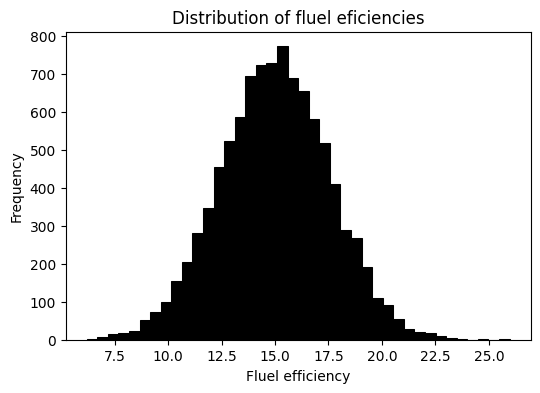

In [17]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fluel efficiency')
plt.title('Distribution of fluel eficiencies')

plt.show()

No long tails, ideal normal distribution

In [8]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [9]:
df.horsepower.median()

np.float64(149.0)

# Prepare and split the dataset

In [8]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [9]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Missing values

## Solution 1: zeros

In [10]:
df_train_0 = df_train.fillna(0)
df_train_0.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [14]:
w_0, w = train_linear_regression(df_train_0.values, y_train)

In [15]:
y_pred = w_0 + df_train_0.dot(w)

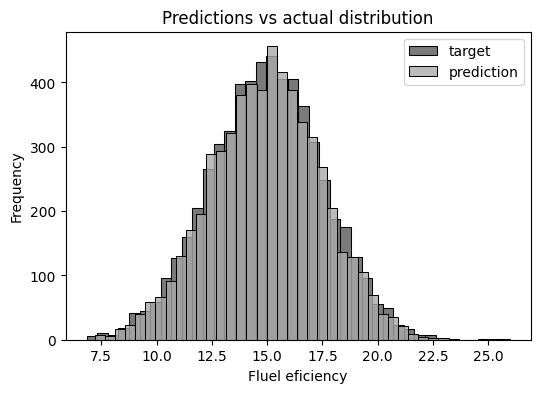

In [18]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Fluel eficiency')
plt.title('Predictions vs actual distribution')

plt.show()

In [16]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [20]:
rmse(y_train, y_pred)

np.float64(0.5202614265099076)

### Validation

In [12]:
df_val_0 = df_val.fillna(0)

In [22]:
y_pred_val_0 = w_0 + df_val_0.dot(w)

In [24]:
round(rmse(y_val, y_pred_val_0), 2)

np.float64(0.52)

## Solution 2: means

In [25]:
mean_h = df_train.horsepower.mean()

In [26]:
df_train_m = df_train.fillna(mean_h)
df_train_m.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


In [27]:
w_0_m, w_m = train_linear_regression(df_train_m.values, y_train)

In [28]:
y_pred_m = w_0_m + df_train_0.dot(w_m)

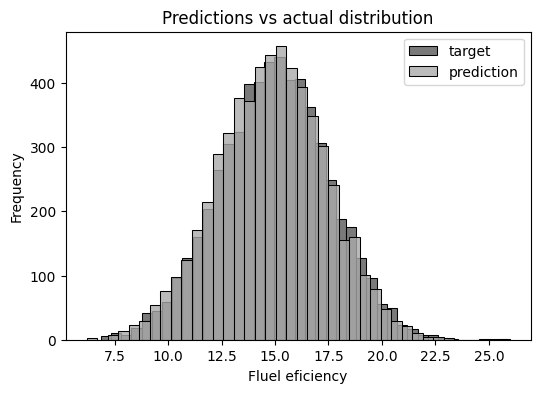

In [29]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_m, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Fluel eficiency')
plt.title('Predictions vs actual distribution')

plt.show()

In [30]:
rmse(y_train, y_pred_m)

np.float64(0.6248117960544057)

### Validation

In [31]:
df_val_m = df_val.fillna(mean_h)

In [32]:
y_pred_val_m = w_0_m + df_val_m.dot(w_m)

In [34]:
round(rmse(y_val, y_pred_val_m), 2)

np.float64(0.46)

# A regularized linear regression

In [39]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(df_train_0.values, y_train, r=r)
    y_pred = w_0 + df_val_0.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

     0 0.52
  0.01 0.52
   0.1 0.52
     1 0.52
     5 0.52
    10 0.52
   100 0.52


# Selecting the seed

In [ ]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [6]:
df_train_list = []
df_val_list = []
df_test_list = []

for x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(x)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    
    df_train_list.append(df_shuffled.iloc[:n_train].copy())
    df_val_list.append(df_shuffled.iloc[n_train:n_train+n_val].copy())
    df_test_list.append(df_shuffled.iloc[n_train+n_val:].copy())

In [11]:
y_train = []
y_val = []
y_test = []

for d in range(len(df_train_list)):
    y_train.append(df_train_list[d].fuel_efficiency_mpg.values)
    del df_train_list[d]['fuel_efficiency_mpg']
    y_val.append(df_val_list[d].fuel_efficiency_mpg.values)
    del df_val_list[d]['fuel_efficiency_mpg']
    y_test.append(df_test_list[d].fuel_efficiency_mpg.values)
    del df_test_list[d]['fuel_efficiency_mpg']

In [17]:
RMSE_scores = []

for d in range(len(df_train_list)):
    df_train_list[d] =  df_train_list[d].fillna(0)
    df_val_list[d] =  df_val_list[d].fillna(0)
    w_0, w = train_linear_regression(df_train_list[d].values, y_train[d])
    y_pred = w_0 + df_val_list[d].dot(w)
    RMSE_scores.append(rmse(y_val[d], y_pred))

In [32]:
RMSE_array = np.array(RMSE_scores)
RMSE_array.std()

np.float64(0.006989446425721602)

In [31]:
round(RMSE_array.std(), 3)

np.float64(0.007)

# Question 6

In [47]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [48]:
df_new = pd.concat([df_train, df_val])

In [49]:
df_new = df_new.fillna(0)
df_new.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9066,240,136.0,4050.512290,2006,10.304700
3073,190,141.0,3195.866942,2017,13.479434
2476,200,184.0,3006.164370,2017,16.190653
658,200,0.0,2947.143980,2022,15.446503
954,250,132.0,3114.371978,2001,14.472172


In [50]:
y_train_new = df_new.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_new['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [52]:
w_0, w = train_linear_regression_reg(df_new.values, y_train_new, r=0.001)
y_pred = w_0 + df_test.dot(w)
rmse(y_pred, y_test)

np.float64(0.4982088125079048)